# Network of LIF neurons (Brunel)

In this exercise we study a well known network of sparsely connected Leaky-Integrate-And-Fire neurons (Brunel, 2000).

### Book chapters

The Brunel model is introduced in Chapter 13 Section 4.2. The network structure is shown in Figure 13.6b. Read the section Synchrony, oscillations, and irregularity and have a look at Figure 13.7. For this exercise, you can skip the explanations related to the Fokker-Planck equation.

### Python classes

The module brunel_model.LIF_spiking_network implements a parametrized network. The figure below shows the simulation result using the default configuration.

To get started, call the function brunel_model.LIF_spiking_network.getting_started()

INFO       width adjusted from 1. ms to 1.05 ms [brian2.monitors.ratemonitor.adjusted_width]


(<Figure size 1000x400 with 3 Axes>,
 <Axes: title={'center': 'Raster Plot'}, ylabel='neuron #'>,
 <Axes: title={'center': 'Population Activity'}, ylabel='A(t) [Hz]'>,
 <Axes: title={'center': 'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

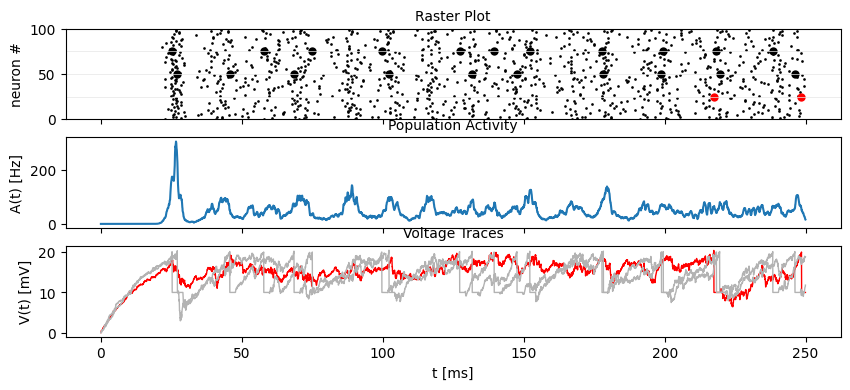

In [1]:
%matplotlib inline  
import numpy as np                                            
from neurodynex3.brunel_model import LIF_spiking_network        # import the network simulator
from neurodynex3.tools import plot_tools                        # import the plot tools
import brian2 as b2                                             # import the Brian2 simulator

rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = LIF_spiking_network.simulate_brunel_network(sim_time=250. * b2.ms)          # simulate the network for 250 ms and return the monitors
plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx, t_min=0.*b2.ms)        # plot the network activity (spikes, rates, voltages)

######  Simulation result. Top: raster plot of 150 randomly selected neurons. Three spike trains are visually highlighted. Middle: time evolution of the population activity A(t). Bottom: Membrane voltage of three neurons. The red color in the top and bottom panels identifies the same neuron.

#### Comments:
The **brunel_model** is used to simulate a sparsely connected network of identical LIF (Leaky Integrate-and-Fire) neurons, based on the Brunel 2000 model.

#### Libraries: 
- The **neurodynex3** library is a collection of Python exercises and tools that cover different aspects of neuronal dynamics.
- The **brian2** library is used to simulate spiking neural networks. 

Note that you can change all parameters of the neuron by using the named parameters of the function simulate_brunel_network(). If you do not specify any parameter, the default values are used (see next code block). You can access these variables in your code by prefixing them with the module name (for example LIF_spiking_network.POISSON_INPUT_RATE).

In [2]:
# Default parameters of a single LIF neuron:
V_REST = 0. * b2.mV                              # resting potential of the membrane (Vr)
V_RESET = +10. * b2.mV                           # reset potential of the membrane (Vreset)
FIRING_THRESHOLD = +20. * b2.mV                  # threshold of the membrane (Vt)
MEMBRANE_TIME_SCALE = 20. * b2.ms                # time constant of the membrane (tau_m)
ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms         # absolute refractory period (t_ref)

# Default parameters of the network
SYNAPTIC_WEIGHT_W0 = 0.1 * b2.mV  # note: w_ee=w_ie = w0 and = w_ei=w_ii = -g*w0
RELATIVE_INHIBITORY_STRENGTH_G = 4.  # balanced
CONNECTION_PROBABILITY_EPSILON = 0.1                  
SYNAPTIC_DELAY = 1.5 * b2.ms
POISSON_INPUT_RATE = 12. * b2.Hz
N_POISSON_INPUT = 1000

## 10.1. Exercise: model parameters and threshold rate
In the first exercise, we get familiar with the model and parameters. Make sure you have read the book chapter . Then have a look at the documentation of simulate_brunel_network(). Note that in our implementation, the number of excitatory presynaptic poisson neurons (input from the external population) is a parameter $N_{e}xtern$ and thus independent of $C_{E}$.

#### Comments:
The **simulate_brunel_network()** function is used to simulate a Brunel network model. This model is a simplified version of a biological network, in which a population of neurons is divided into two types: excitatory and inhibitory.

Let's break down the terms:

- $N_{e}xtern$: This parameter represents the number of external excitatory Poisson neurons. In other words, it's the number of neurons in the external population that are providing input to the network. These inputs are modeled as Poisson spike trains.
- $C_{E}$: This is a parameter representing the number of connections coming from excitatory neurons in the network.

In [3]:
help(LIF_spiking_network.simulate_brunel_network)  # show the help of the simulate_brunel_network function - this shows the default values of the parameters

Help on function simulate_brunel_network in module neurodynex3.brunel_model.LIF_spiking_network:

simulate_brunel_network(N_Excit=5000, N_Inhib=None, N_extern=1000, connection_probability=0.1, w0=100. * uvolt, g=4.0, synaptic_delay=1.5 * msecond, poisson_input_rate=13. * hertz, w_external=None, v_rest=0. * volt, v_reset=10. * mvolt, firing_threshold=20. * mvolt, membrane_time_scale=20. * msecond, abs_refractory_period=2. * msecond, monitored_subset_size=100, random_vm_init=False, sim_time=100. * msecond)
    Fully parametrized implementation of a sparsely connected network of LIF neurons (Brunel 2000)
    
    Args:
        N_Excit (int): Size of the excitatory popluation
        N_Inhib (int): optional. Size of the inhibitory population.
            If not set (=None), N_Inhib is set to N_excit/4.
        N_extern (int): optional. Number of presynaptic excitatory poisson neurons. Note: if set to a value,
            this number does NOT depend on N_Excit and NOT depend on connection_p

## 10.1.1. Question:

 ***Run the simulation with the default parameters (see code block above). In that default configuration, what are the values of the variables $N_{E}$, $N_{I}$, $C_{E}$, $C_{I}$, $w_{EE}$, $w_{EI}$, $w_{IE}$, and $w_{II}$? The variables are described in the book and in Fig. 13.6.***

Based on the default parameters set for single Neuron and Network, we can calculate the values of the variables $N_{E}$, $N_{I}$, $C_{E}$, $C_{I}$, $w_{EE}$, $w_{EI}$, $w_{IE}$, and $w_{II}$ as follows:
- $w_{EE}$ and $w_{IE}$: These represents the synaptic weight from excitatory neurons to both other excitatory neurons and inhibitory neurons. It seems to correspond to **SYNAPTIC_WEIGHT_W0**, which is 0.1 mV in this case.
- $w_{EI}$ and $w_{II}$: These represents the synaptic weight from inhibitory neurons to both other excitatory neurons and inhibitory neurons. It seems to correspond to **SYNAPTIC_WEIGHT_W0** scaled by **RELATIVE_INHIBITORY_STRENGTH_G**, so in this case it's -0.1 mV * 4 = -0.4 mV (signifying an inhibitory synaptic weight four times as strong as the excitatory weight).
- The **CONNECTION_PROBABILITY_EPSILON** corresponds to the probability of a connection between neurons in the network, which could be used to calculate $C_{E}$ and $C_{I}$. If **CONNECTION_PROBABILITY_EPSILON** is 0.1, then on average each neuron is connected to 10% of all other neurons in the network.
    * $C_{E}$: This is the number of connections coming from excitatory neurons in the network. So $C_{E}$ = **CONNECTION_PROBABILITY_EPSILON** * N_Excit = 0.1 * 5000 = 500
    * $C_{I}$: This is the number of connections coming from inhibitory neurons in the network. So $C_{I}$ = **CONNECTION_PROBABILITY_EPSILON** * N_Inhib = 0.1 * 1250 = 125
- $N_{E}$: This is the size of the excitatory population, so $N_{E}$ = N_Excit = 5000
- $N_{I}$: This is the size of the inhibitory population, so $N_{I}$ = N_Inhib = N_Excit/4 = 1250


(<Figure size 1000x400 with 3 Axes>,
 <Axes: title={'center': 'Raster Plot'}, ylabel='neuron #'>,
 <Axes: title={'center': 'Population Activity'}, ylabel='A(t) [Hz]'>,
 <Axes: title={'center': 'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

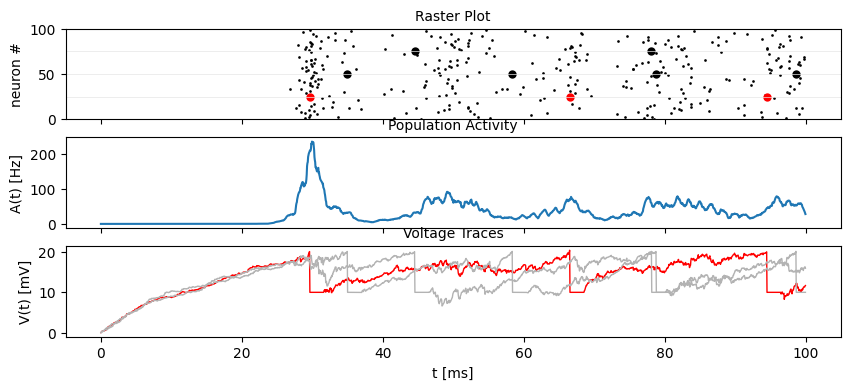

In [5]:
rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = \
LIF_spiking_network.simulate_brunel_network(v_rest=V_REST, v_reset=V_RESET, firing_threshold=FIRING_THRESHOLD,
                                                membrane_time_scale=MEMBRANE_TIME_SCALE,
                                                abs_refractory_period=ABSOLUTE_REFRACTORY_PERIOD, w0=SYNAPTIC_WEIGHT_W0,
                                                g=RELATIVE_INHIBITORY_STRENGTH_G,
                                                connection_probability=CONNECTION_PROBABILITY_EPSILON,
                                                synaptic_delay=SYNAPTIC_DELAY, poisson_input_rate=POISSON_INPUT_RATE,
                                                N_extern=N_POISSON_INPUT)

plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list= \
                                 monitored_spike_idx, t_min=0.*b2.ms)        # plot the network activity (spikes, rates, voltages)

###### Same Raster plot as above, but with the neurons sorted by their firing rate. The neurons with the highest firing rate are at the top. The neurons with the lowest firing rate are at the bottom. This plot is useful to identify the neurons that are most active and those that are silent.

***What are the units of the weights $w$?***

From the default parameters you listed, the synaptic weight (**SYNAPTIC_WEIGHT_W0**) is given as 0.1 * b2.mV, indicating the weights are in millivolts (mV).

***The frequency $ν_{threshold}$ is is the poisson rate of the external population sufficient to drive the neurons in the network to the firing threshold. Using Eq. (1), compute $ν_{threshold}$. You can do this in Python, e.g. use LIF_spiking_network.FIRING_THRESHOLD for $u_{thr}$, etc.***

#### $ν_{threshold} = \frac{u_{thr}}{N_{e}xtern w_{0} \tau_{m}}$ 
Eq (1) 

In [6]:
import brian2 as b2

# parameters
u_thr = LIF_spiking_network.FIRING_THRESHOLD
N_extern = LIF_spiking_network.N_POISSON_INPUT
w_0 = LIF_spiking_network.SYNAPTIC_WEIGHT_W0
tau_m = LIF_spiking_network.MEMBRANE_TIME_SCALE

# compute nu_threshold
nu_threshold = u_thr / (N_extern * w_0 * tau_m)

# convert to Hz
nu_threshold = nu_threshold / b2.Hz
print("The threshold frequency ν_threshold is {} Hz".format(nu_threshold))

The threshold frequency ν_threshold is 10.0 Hz


***Refering to Fig. 13.7, left panel, what is the meaning of the value 1 on the y-axis (Input). What is the horizontal dashed line designating? How is it related to $u_{thr}$?***

In neural network models, an input value of 1 on the y-axis might denote the maximum normalized input to a neuron, if the inputs are normalized. The horizontal dashed line represents a certain threshold value. For $u_{thr}$, it's plausible that this dashed line designates the firing threshold of the neurons.

***Run a simulation for 500ms. Set poisson_input_rate to $ν_{threshold}$. Plot the network activity in the time interval [0ms, 500ms]. Is the network quiet (Q)?***

(<Figure size 1000x400 with 3 Axes>,
 <Axes: title={'center': 'Raster Plot'}, ylabel='neuron #'>,
 <Axes: title={'center': 'Population Activity'}, ylabel='A(t) [Hz]'>,
 <Axes: title={'center': 'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

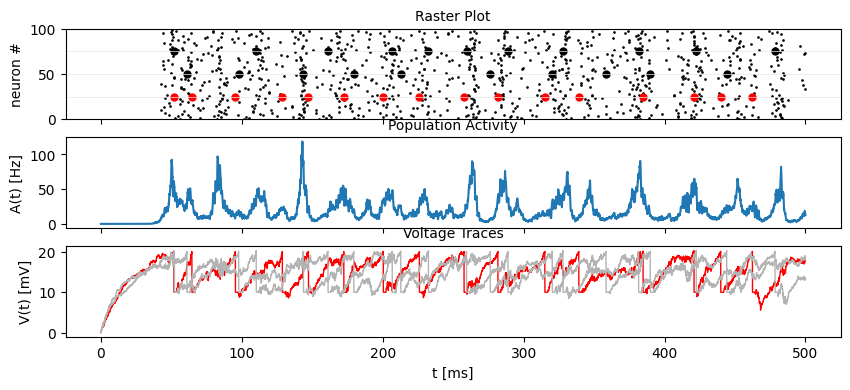

In [7]:
# Running the simulation
poisson_input_rate = nu_threshold * b2.Hz      # set the poisson input rate to the threshold frequency, converting it from Hz to 1/ms
sim_time = 500. * b2.ms

rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = LIF_spiking_network.simulate_brunel_network(poisson_input_rate=poisson_input_rate, sim_time=sim_time)

# Plotting network activity
plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx, t_min=0.*b2.ms, t_max=sim_time)

###### The plot suggests that the neurons in the network are highly active. The network is far from being quiet -- it's very active. This could be because the input rate ( in this case, set to the threshold frequency $\nu_{threshold}$ ) is sufficiently high to drive the neurons past their firing threshold frequently.

***During the simulation time, what is the average firing rate of a single neuron? You can access the total number of spikes from the SpikeMonitor object in Brian2 with the command spike_monitor.num_spikes and the number of neurons in the network with spike_monitor.source.N .***

In [10]:
total_spikes = spike_monitor.num_spikes
num_neurons = spike_monitor.source.N
sim_time = 500. * b2.ms  # given the simulation time is 500ms

# Convert simulation time to seconds for rate calculation
sim_time_seconds = sim_time / b2.second

# Calculate average firing rate per neuron
average_firing_rate = total_spikes / num_neurons / sim_time_seconds

print("The average firing rate is {} Hz".format(average_firing_rate)) 
# This is an average measure. The actual firing rate may vary across different neurons in the network.

The average firing rate is 20.3344 Hz


### 10.2. Exercise: Population activity
The network of spiking LIF-neurons shows characteristic population activities. In this exercise we investigate the asynchronous irregular (AI), synchronous regular (SR), fast synchronous irregular (SI-fast) and slow synchronous irregular (SI-slow) activity types.

#### 10.2.1. Question: Network states

* The function simulate_brunel_network() gives you three options to vary the input strength (y-axis in Figure 13.7a). Which options do you have?
* Which parameter of the function simulate_brunel_network() lets you change the relative strength of inhibition (the x-axis in Figure 13.7, a)?
* Define a network of 6000 excitatory and 1500 inhibitory neurons. Find the appropriate parameters and simulate the network in the regimes AI, SR, SI-fast and SI-slow. For each of the four configurations, plot the network activity and compute the average firing rate. Run each simulation for at least 1000ms and plot two figures for each simulation: one showing the complete simulation time and one showing only the last ~50ms.
* What is the population activity A(t) in each of the four conditions (in Hz, averaged over the last 200ms of your simulation)?

#### 10.2.2. Question: Interspike interval (ISI) and Coefficient of Variation (CV)
Before answering the questions, make sure you understand the notions ISI and CV. If necessary, read Chapter 7.3.1 .

* What is the CV of a Poisson neuron?

* From the four figures plotted in the previous question, qualitatively interpret the spike trains and the population activity in each of the four regimes: <br>
        *       What is the mean firing rate of a single neuron (only a rough estimate). <br>
        *       Sketch the ISI histogram. (Is it peaked or broad? Where’s the maximum?)  <br> 
        *       Estimate the CV. (Is it <1, ≪1, =1, >1?) 
* Validate your estimates using the functions spike_tools.get_spike_train_stats() and plot_tools.plot_ISI_distribution(). Use the code block provided here.

* Make sure you understand the code block. Why is the function spike_tools.get_spike_train_stats called with the parameter window_t_min=100.*b2.ms?


WARNING    c:\Users\w-t\AppData\Local\Programs\Python\Python310\lib\site-packages\brian2\units\fundamentalunits.py:230: RuntimeWarning: Mean of empty slice.
  return Quantity(func(np.array(x, copy=False), *args, **kwds), dim=x.dim)
 [py.warnings]
WARNING    c:\Users\w-t\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 [py.warnings]


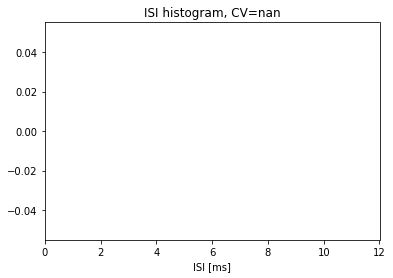

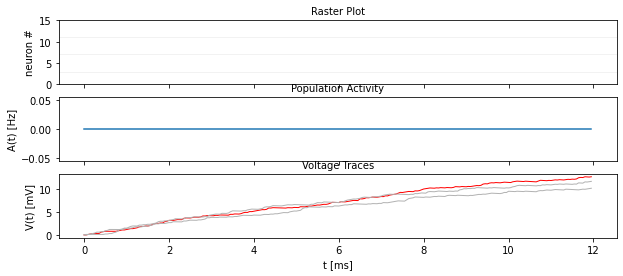

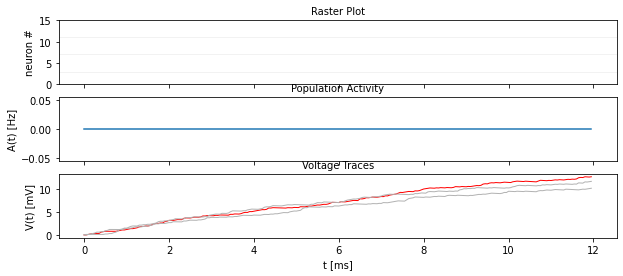

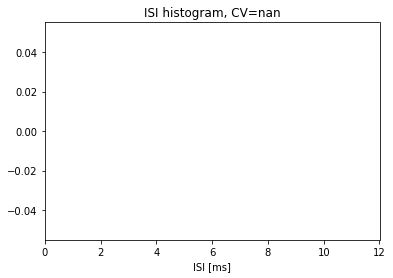

In [13]:
%matplotlib inline
from neurodynex3.brunel_model import LIF_spiking_network
from neurodynex3.tools import plot_tools, spike_tools
import brian2 as b2

XXXX = 12                        # poisson input rate
poisson_rate = XXXX *b2.Hz
g = XXXX
CE = XXXX
simtime = XXXX *b2.ms

rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = LIF_spiking_network.simulate_brunel_network(N_Excit=CE, poisson_input_rate=poisson_rate, g=g, sim_time=simtime)
plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx, t_min = 0*b2.ms)
plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx, t_min = simtime - XXXX *b2.ms)
spike_stats = spike_tools.get_spike_train_stats(spike_monitor, window_t_min= 100 *b2.ms)
plot_tools.plot_ISI_distribution(spike_stats, hist_nr_bins=100, xlim_max_ISI= XXXX *b2.ms)

* In the Synchronous Regular (SR) state, what is the dominant frequency of the population activity A(t)? Compare this frequency to the firing frequency of a single neuron. You can do this “visually” using the plots created by plot_tools.plot_network_activity() or by solving the bonus exercise below.

### 10.3. Exercise: Emergence of Synchronization
The different regimes emerge from the recurrence and the relative strength of inhibition g. In the absence of recurrent excitatory connections, the network would approach a constant mean activity A(t).

#### 10.3.1. Question:
* Simulate a network of 6000 excitatory and 1500 inhibitory neurons. Set the following parameters: poisson_rate=14*b2.Hz, g=2.5. In which state is this network?
* What would the population activity be if we would have only external input? We can simulate this. Run a simulation of the same network, but disable the recurrent excitatory connections: simulate_brunel_network(...,w0=0.*b2.mV, w_external=LIF_spiking_network.SYNAPTIC_WEIGHT_W0).
* Explain why the non-recurrent network shows a strong synchronization in the beginning and why this synchronization fades out.
* The non-recurrent network is strongly synchronized in the beginning. Is the connected network simply “locked” to this initial synchronization? You can falsify this hypothesis by initializing each neuron in the network with a random vm. Run the simulation with random_vm_init=True to see how the synchronization emerges over time.

### 10.4. Bonus: Power Spectrum of the Population Activity
We can get more insights into the statistics of the network activity by analysing the power spectrum of the spike trains and the population activity. The four regimes (SR, AI, SI-fast, SI-slow) are characterized by two properties: the regularity/irregularity of individual neuron’s spike trains and the stationary/oscillatory pattern of the population activity A(t). We transform the spike trains and A(t) into the frequency domain to identify regularities.

#### 10.4.1. Question: Sampling the Population Activity
* When analysing the population activity A(t), what is the lowest/highest frequency we are interested in?

The highest frequency $f_{max}$ one can resolve from the time series A(t) is determined by $\Delta t$. Even if we are not interested in very high frequencies, we should not increase $\Delta t$ (too much) because it may affect the accuracy of the simulation.


The lowest frequency $\Delta f$ is determined by the signal length $T_{simulation}$. We could therefore decrease the simulation duration if we accept decreasing the resolution in the frequency domain. But there is another option: We use a “too long” simulation time $T_{simulation}$ but then split the RateMonitor.rate signal into $k$ chunks of duration $T_{signal}$. We can then average the power across the $k$ repetitions. This is what the function spike_tools.get_population_activity_power_spectrum() does - we just have to calculate the parameters first:

* Given the values $\Delta f$=5Hz,$\Delta t$=0.1ms,$T_{init}$=100ms,$k$=5, compute $T_{signal}$ and $T_{simulation}$.

#### 10.4.2. Question: Sampling a Single Neuron Spike Train
* The sampling of each individual neuron’s spike train is different because the signal is given as a list of timestamps (SpikeMonitor.spike_trains) and needs to be transformed into a binary vector. This is done inside the function spike_tools.get_averaged_single_neuron_power_spectrum(). Read the doc to learn how to control the sampling rate.
* The firing rate of a single neuron can be very low and very different from one neuron to another. For that reason, we do not split the spike train into k realizations but we analyse the full spike train (Tsimulation−Tinit). From the simulation, we get many (CE+CI) spike trains and we can average across a subset of neurons. Check the doc of spike_tools.get_averaged_single_neuron_power_spectrum() to learn how to control the number of neurons of this subset.

#### 10.4.3. Question: Single Neuron activity vs. Population Activity
We can now compute and plot the power spectrum.

* For each network states SR, AI, SI-fast, SI-slow, find the parameters, then compute and plot the power spectrum using the script given here. Make sure you understand the script and read the documentation of the functions spike_tools.get_averaged_single_neuron_power_spectrum(), plot_tools.plot_spike_train_power_spectrum(), spike_tools.get_population_activity_power_spectrum(), and plot_tools.plot_population_activity_power_spectrum().
* Discuss power spectra of the states SR, AI, SI-fast and SI-slow. Compare the individual neuron’s spike train powers to the averaged power spectrum and to the power spectrum of A(t).

In [17]:
%matplotlib inline
from neurodynex3.brunel_model import LIF_spiking_network
from neurodynex3.tools import plot_tools, spike_tools
import brian2 as b2

# Specify the parameters of the desired network state (e.g. SI fast)
XXXX = 0.1 * b2.mV
poisson_rate = XXXX *b2.Hz
g = XXXX
CE = XXXX

# Specify the signal and simulation properties:
delta_t = XXXX * b2.ms
delta_f = XXXX * b2.Hz
T_init = XXXX * b2.ms
k = XXXX

# compute the remaining values:
f_max = XXXX
N_samples = XXXX
T_signal = XXXX
T_sim = k * T_signal + T_init

# replace the XXXX by appropriate values:

print("Start simulation. T_sim={}, T_signal={}, N_samples={}".format(T_sim, T_signal, N_samples))
b2.defaultclock.dt = delta_t
# for technical reason (solves rounding issues), we add a few extra samples:
stime = T_sim + (10 + k) * b2.defaultclock.dt
rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = \
    LIF_spiking_network.simulate_brunel_network(
        N_Excit=CE, poisson_input_rate=poisson_rate, g=g, sim_time=stime)

plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor,
                                 spike_train_idx_list=monitored_spike_idx, t_min=0*b2.ms)
plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor,
                                 spike_train_idx_list=monitored_spike_idx, t_min=T_sim - XXXX *b2.ms)
spike_stats = spike_tools.get_spike_train_stats(spike_monitor, window_t_min= T_init)
plot_tools.plot_ISI_distribution(spike_stats, hist_nr_bins= XXXX, xlim_max_ISI= XXXX *b2.ms)

#  Power Spectrum
pop_freqs, pop_ps, average_population_rate = \
    spike_tools.get_population_activity_power_spectrum(
        rate_monitor, delta_f, k, T_init)
plot_tools.plot_population_activity_power_spectrum(pop_freqs, pop_ps, XXXX *b2.Hz, average_population_rate)
freq, mean_ps, all_ps, mean_firing_rate, all_mean_firing_freqs = \
    spike_tools.get_averaged_single_neuron_power_spectrum(
        spike_monitor, sampling_frequency=1./delta_t, window_t_min= T_init,
        window_t_max=T_sim, nr_neurons_average= XXXX )
plot_tools.plot_spike_train_power_spectrum(freq, mean_ps, all_ps, max_freq= XXXX * b2.Hz,
                                           mean_firing_freqs_per_neuron=all_mean_firing_freqs,
                                           nr_highlighted_neurons=2)
print("done")

DimensionMismatchError: Cannot calculate 10000. uV^2 + 100. nWb, units do not match (units are V^2 and Wb).

The figures below show the type of analysis you can do with this script. The first figure shows the last 80ms of a network simulation, the second figure the power spectrum of the population activity A(t) and the third figure shows the power spectrum of single neurons (individual neurons and averaged across neurons). Note the qualitative difference between the spectral density of the population and that of the individual neurons.